/tmp/ipykernel_57399/2254211928.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


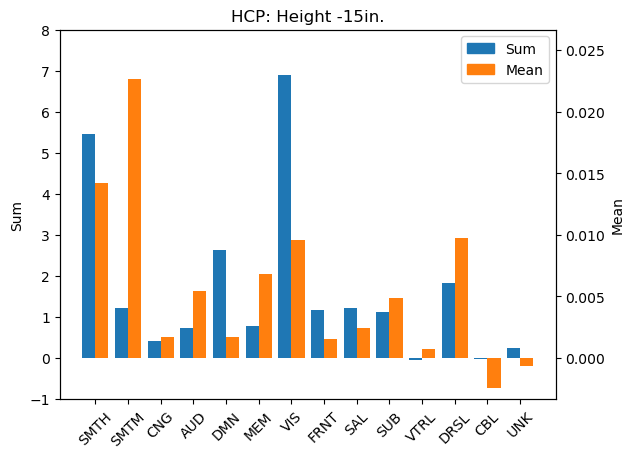

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from nilearn import plotting
import matplotlib.patches as mpatches

labels = ['SMTH','SMTM','CNG','AUD','DMN','MEM','VIS','FRNT','SAL','SUB','VTRL','DRSL','CBL','UNK']

def makefig(title, sums, means, lim, hcpukb):
    fig, ax = plt.subplots(1,1)

    ax.bar(labels, sums, width=-0.4, align='edge')
    ax0 = ax.twinx()
    ax0.bar(labels, means, width=0.4, align='edge', color='tab:orange')
    ax.set_xticklabels(labels, rotation=45)

    lim = np.array(lim)
    ax.set_ylim(lim)
    ax0.set_ylim(lim/300)

    ax.set_ylabel('Sum')
    ax0.set_ylabel('Mean')

    handles = [mpatches.Patch(color='tab:blue', label='Sum'), 
               mpatches.Patch(color='tab:orange', label='Mean')]

    ax.set_title(title)
    ax.legend(handles=handles)

    tit2 = title.replace(' ', '_')
    
    fig.show()
    fig.savefig(f'/home/anton/Documents/Yale/{hcpukb}/Figures/FCChanges2/networks_{tit2}.pdf')

title = 'HCP: Height -15in.'
sums = '''5.452512121424573
1.2082162182915712
0.40857156505567993
0.7374966577839116
2.6202313105895825
0.7691065749199079
6.884242331122571
1.1794161650332835
1.2158727767542046
1.1258425642921213
-0.046868570672973696
1.8364647704620018
-0.025126808280161037
0.25421339196078974
'''.split()
sums = [float(s) for s in sums]
means = '''0.01418410772748364
0.022656263206238432
0.0016804403466162993
0.005403077255260704
0.0017069655841686234
0.006789259439827541
0.009605268652484325
0.0015674788546971086
0.0024677697760717857
0.004869513296576694
0.000773546945668056
0.009740770069514553
-0.002442338754473054
-0.0006531611338244942
'''.split()
means = [float(m) for m in means]
lim = [-1, 8]

makefig(title, sums, means, lim, 'HCP')

In [24]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

network_dct = {'DMN': 'tab:blue', 'VIS': 'tab:orange', 'SUB': 'tab:green', 'UNK': 'tab:red', 'FRNT': 'tab:purple', 
               'DRSL': 'tab:brown', 'AUD': 'tab:pink', 'MEM': 'tab:grey', 'SMTH': 'tab:olive', 'SMTM': 'tab:cyan'}


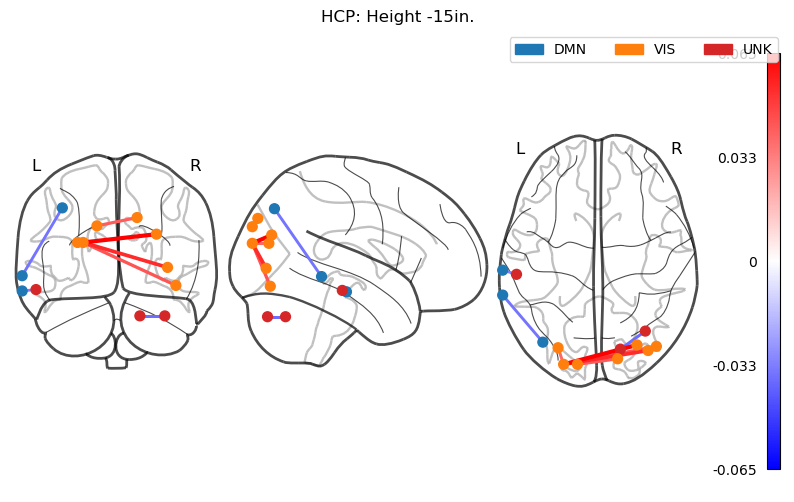

In [32]:
import nilearn

rois = nilearn.datasets.fetch_coords_power_2011()['rois']

def makefigedges(title, top_edges, hcpukb):
    rois_set = set()
    nets_set = set()
    top_edges = top_edges.split('\n')
    
    for i in range(len(top_edges)):
        ep = top_edges[i].split()
        ep[1] = ours2orig[int(ep[1])]
        ep[2] = ours2orig[int(ep[2])]
        ep[3] = network_dct[ep[3]]
        ep[4] = network_dct[ep[4]]
        nets_set.add(ep[3])
        nets_set.add(ep[4])
        ep[5] = float(ep[5])
        rois_set.add(ep[1])
        rois_set.add(ep[2])
        top_edges[i] = ep
        
    rois_list = list(rois_set)
    nrois = len(rois_list)
    coords = np.zeros((nrois, 3))
    adj_mat = np.zeros((nrois, nrois))
    colors = [None]*nrois
    
    for e in top_edges:
        i1 = rois_list.index(e[1])
        i2 = rois_list.index(e[2])
        adj_mat[i1,i2] = e[5]
        adj_mat[i2,i1] = e[5]
        c1 = rois.iloc[e[1]]
        c2 = rois.iloc[e[2]]
        coords[i1] = (c1.x, c1.y, c1.z)
        coords[i2] = (c2.x, c2.y, c2.z)
        colors[i1] = e[3]
        colors[i2] = e[4]

    fig, ax = plt.subplots(1,1,figsize=(10,6))
    plotting.plot_connectome(adj_mat, coords, colors, colorbar=True, axes=ax)
    handles = [mpatches.Patch(color=v, label=k) for k,v in network_dct.items() if v in nets_set]
    ax.legend(handles=handles, ncol=3)
    ax.set_title(title)
    fig.show()

    tit2 = title.replace(' ', '_')
    
    fig.savefig(f'/home/anton/Documents/Yale/{hcpukb}/Figures/FCChanges2/edges_{tit2}.pdf')

title = 'HCP: Height -15in.'
top_edges = '''25945 131 139 VIS VIS 0.06527285113674382
25961 131 155 VIS VIS 0.05405828213169776
25941 131 135 VIS VIS 0.043810525440910957
26715 137 138 VIS VIS 0.041523620524248545
25672 129 131 VIS VIS 0.03838451457955425
34688 256 257 UNK UNK -0.03754314770308711
16603 73 106 DMN DMN -0.03520104544541125
16364 71 248 DMN UNK -0.03246998016622929'''

makefigedges(title, top_edges, 'HCP')